# Visualizing Earnings Based on College Majors 

We're working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on the job outcomes was released by the [American Community Survery](https://www.census.gov/programs-surveys/acs/), which conduts surveys and aggregates the data. 

FiveThiryEight cleaned the dataset and released it on their [Github Repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)


Each row in the dataset represents a different major in college and contains the following information:
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Questions to explore in the dataset:
1. What's the most common median salary range?
By analyzing the above graphs we can begin to answer some specific questions: 

1. Do students in more popular majors make more money?

2. Is there any link between the number of full-time employees and median salary?


Conclusion: 

1. From looking at the median histogram, we can see the highest percentage of median salary falls in between $\$$30,000 and $\$$40,000, so we use the range arg to zoom in and we can see the most common median salary is about $35,000.

2. No, as you can see from the bottom two plots, the majors with fewer students have a higher median, for females, the most popular major, with over 300,000 graduates, have a median salary of less than $40,000.

3. No, as you can see from the 'Median vs Full Time' plot, majors that had many full time employed earned just the same or lower than the majors with less full time employed.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [40]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

As we can see, columns Total, Men, Women and ShareWomen have one (1) NaN or null values, since we're using  matplotlib based in pandas, we have to remove the null values below and reassign the data to the recent_grads DataFrame

In [41]:
recent_grads = recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

In [42]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [43]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

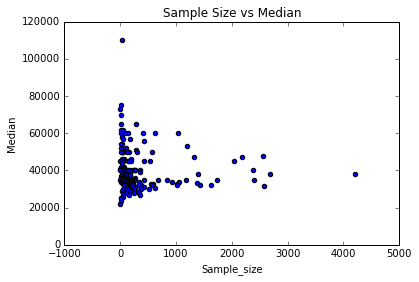

In [44]:
ax1 = recent_grads.plot(x = 'Sample_size',
                         y = 'Median',
                         kind = 'scatter')
ax1.set_title('Sample Size vs Median')

plt.show()

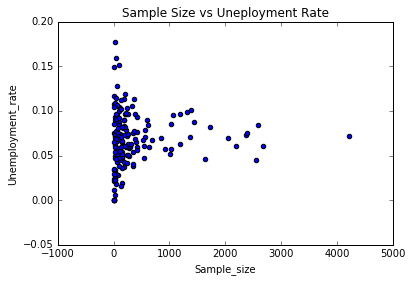

In [45]:
ax2 = recent_grads.plot(x = 'Sample_size',
                         y = 'Unemployment_rate',
                         kind = 'scatter')
ax2.set_title('Sample Size vs Uneployment Rate')

plt.show()

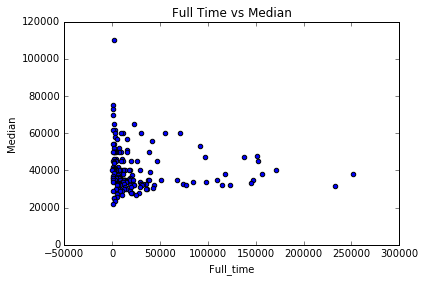

In [46]:
ax3 = recent_grads.plot(x = 'Full_time',
                         y = 'Median',
                         kind = 'scatter')
ax3.set_title('Full Time vs Median')

plt.show()

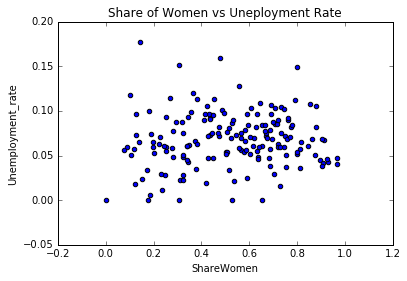

In [47]:
ax4 = recent_grads.plot(x = 'ShareWomen',
                         y = 'Unemployment_rate',
                         kind = 'scatter')
ax4.set_title('Share of Women vs Uneployment Rate')

plt.show()

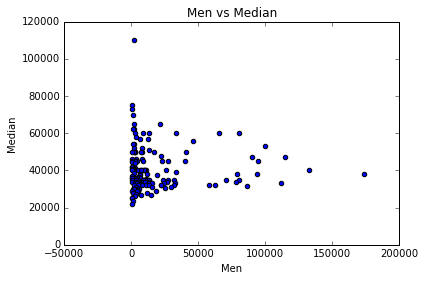

In [48]:
ax5 = recent_grads.plot(x = 'Men',
                         y = 'Median',
                         kind = 'scatter')
ax5.set_title('Men vs Median')

plt.show()

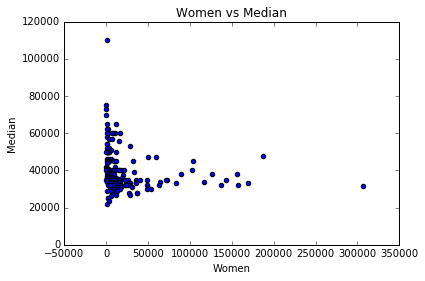

In [49]:
ax6 = recent_grads.plot(x = 'Women',
                         y = 'Median',
                         kind = 'scatter')
ax6.set_title('Women vs Median')

plt.show()

By analyzing the above graphs we can begin to answer some specific questions: 

1. Do students in more popular majors make more money?

**No, as you can see from the bottom two plots, the majors with fewer students have a higher median, for females, the most popular major, with over 300,000 graduates, have a median salary of less than $40,000**

2. Is there any link between the number of full-time employees and median salary?

**No, as you can see from the 'Median vs Full Time' plot, majors that had many full time employed earned just the same or lower than the majors with less full time employed**

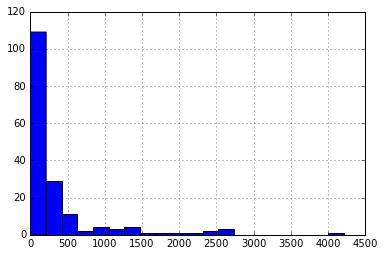

In [50]:
recent_grads['Sample_size'].hist(bins = 20)

plt.show()

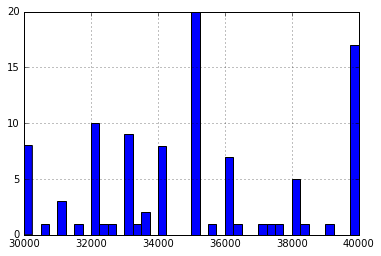

In [51]:
(recent_grads['Median']
 .hist(bins=40, range = (30000, 40000)))

plt.show()

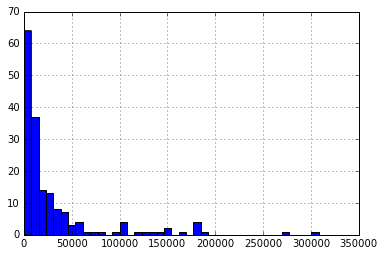

In [52]:
(recent_grads['Employed']
 .hist(bins=40))

plt.show()

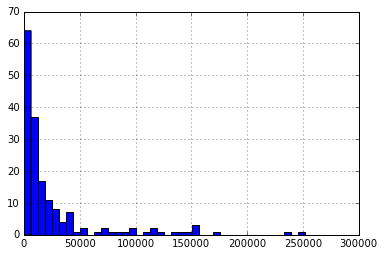

In [53]:
(recent_grads['Full_time']
 .hist(bins=40))

plt.show()

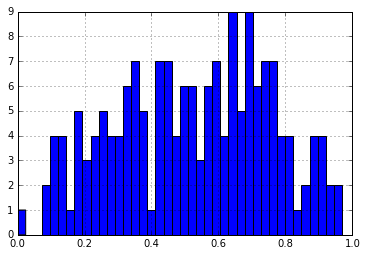

In [54]:
(recent_grads['ShareWomen']
 .hist(bins=40))

plt.show()

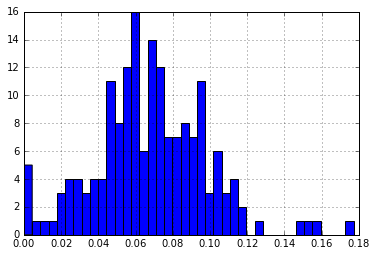

In [55]:
(recent_grads['Unemployment_rate']
 .hist(bins=40))

plt.show()

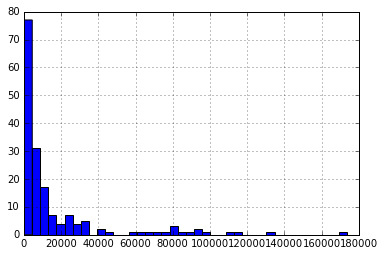

In [56]:
(recent_grads['Men']
 .hist(bins=40))

plt.show()

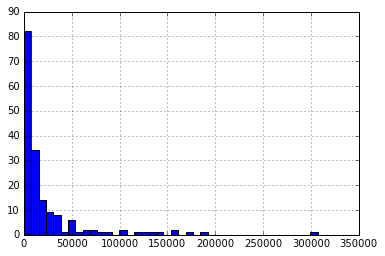

In [57]:
(recent_grads['Women']
 .hist(bins=40))

plt.show()

What's the most common median salary range?

**From looking at the median histogram, we can see the highest percentage of median salary falls in between 30,000 and 40,000, so we use the range arg to zoom in and we can see the most common median salary is about $35,000**

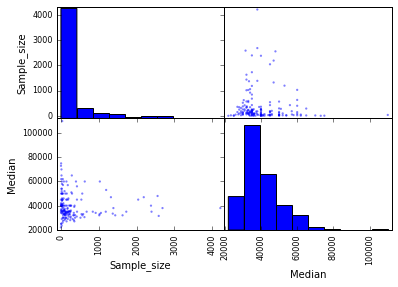

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    recent_grads[['Sample_size', 'Median']])
plt.show()

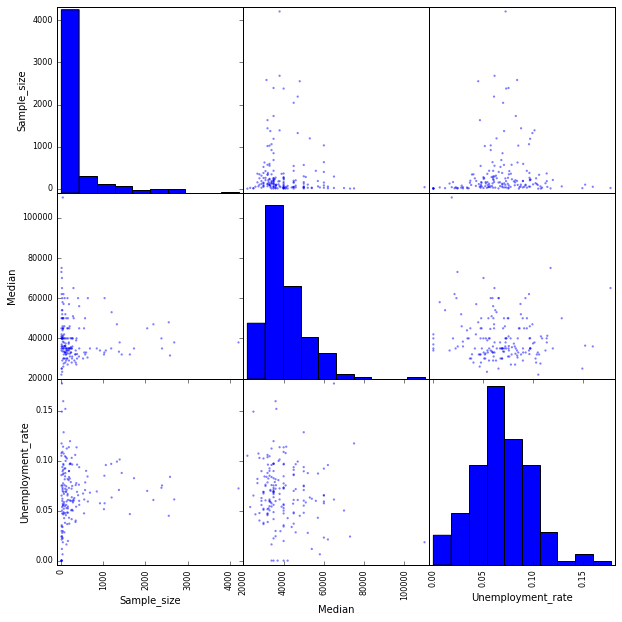

In [59]:
scatter_matrix(recent_grads[['Sample_size', 
'Median', 'Unemployment_rate']], 
               figsize = (10, 10))

plt.show()

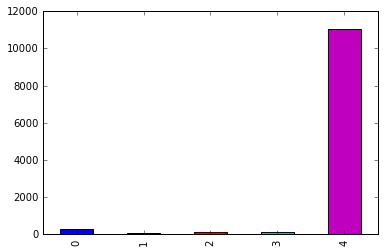

In [60]:
recent_grads[:5]['Women'].plot(kind = 'bar')

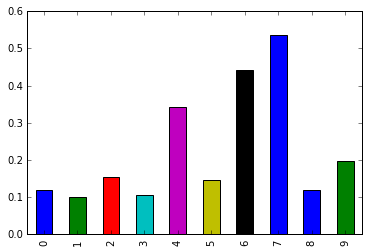

In [71]:
(recent_grads['ShareWomen']
 .head(10)
 .plot.bar(x = 'ShareWomen'))

plt.show()

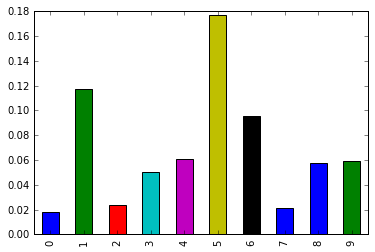

In [75]:
(recent_grads['Unemployment_rate']
 .head(10)
 .plot.bar(x = 'Unemployment_rate'))

plt.show()